# ArcGIS API for Python: Administering Your Web GIS

+ Andrew Chapkowski
+ Bill Major

# Agenda

### Portal and ArcGIS Online Administration

- Common Portal Administration Tasks
    + Creating Users
    + Assigning Groups
    + Loading Content

- Migrating GIS resources
- Credit Monitoring
- Usage Statistics


# Agenda 

### Server Administration

- services
- folders
- logs
- usage

### Automating the API
- Scheduling Scripts
- AWS Lambda

# What is Enterprise GIS?

<center><img src="http://www.esri.com/~/media/Images/Content/technology-topics/enterprise-gis/graphics/enterprise.jpg" /></center>

- It is a platform for delivering organization-wide geospatial capabilities while improving access to geographic information and extending geospatial capabilities to nontraditional users of GIS.

# The ArcGIS API for Python

- Python library for working with maps and geospatial data, powered by web GIS
- Provides simple and efficient tools:

    + vector and raster analysis
    + geocoding
    + content presentation
    + routing
    + managing organizations
    + user, content, group management




# Getting Started 

- Use the **GIS** to connect to the site.
    + supports multiple types of authentication



In [1]:
from arcgis.gis import GIS

In [2]:
gis = GIS(url="http://python.playground.esri.com/portal")

In [3]:
gis = GIS(url="http://python.playground.esri.com/portal", 
          username='andrew')

Enter password: ········


In [5]:
gis = GIS(url='https://acpythondev.esri.com/portal', username='admin', verify_cert=False)

Enter password: ········


# Creating Users

## Default Portal Users:

1. Viewer
2. Publisher
3. Administrators

## Levels

- Level 1 membership is for members who only need privileges to view content
- Level 2 membership is for members who need to view, create, and share content

# Getting Help Demo!

# Creating Users (continued)

- Once you decide the type of user needed create it.

In [6]:
users = gis.users


In [7]:
user = users.create(username="pubaccount",
                    password="abcd1234!",
                    firstname="erase",
                    lastname="me",
                    email='fakeaccount@esri.com',
                    role="account_user",
                    level=2,
                    provider='arcgis'
                   )
user

<User username:pubaccount>

### Updating Accounts

<User username:pubaccount>
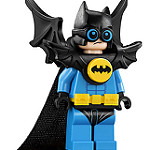

In [18]:
user.update(first_name="Robert", last_name="Grayson", thumbnail=r"./img/nw.jpg")
user

# Deleting Accounts

In [19]:
user.delete()

True

In [20]:
user = users.get('geodemo')

# Content Management

<center><img src='./img/content.png' /></center>

# Content Management

#### Owners and Administrators

- Add
- Remove 
- Update

## Who Can Publish Content?

- Administrators, Organization Publishers, or Custom Roles with Publishing Enabled.

# Adding Content

- Adding a File GeoDatabase

In [21]:
fgdb_item = gis.content.add(
    item_properties={
        'title' : 'Survey Grid',
        'type' : 'File Geodatabase',
        'tags' : ['survey','area', 'land']
        },
        data="./data/publishing_data/survey.gdb.zip"
)

In [22]:
fgdb_item

<Item title:"Survey Grid" type:File Geodatabase owner:admin>

- Adding a Shapefile

In [23]:
shp_item = gis.content.add(
    item_properties={
        'title' : 'United States',
        'type' : 'Shapefile',
        'tags' : ['boundary','US', 'North America']
        },
    data="./data/publishing_data/states.shp.zip"
)

In [24]:
shp_item

<Item title:"United States" type:Shapefile owner:admin>

## Publishing Content

- up until now the data is just raw information
- any publishable item (csv, shapfile, file geodatabase, etc...) has a publish method

In [25]:
pshp = shp_item.publish(publish_parameters={"maxRecordCount": 2000, 
                                         "hasStaticData": True, 
                                         "name": "UnitedStates", 
                                         "layerInfo": {"capabilities": "Query"}})
pshp

<Item title:"United States" type:Feature Layer Collection owner:admin>

## Publishing Content (continued)

In [ ]:
pfgdb = fgdb_item.publish()
pfgdb

<Item title:"Survey Grid" type:Feature Layer Collection owner:admin>

# Cloning Items Between Sites

- Copy data from Portal **A** to Portal **B**


In [ ]:
from arcgis.gis import GIS
import getpass
gis_dest = GIS(url="http://acpythondev.esri.com/portal", username='admin', password=getpass.getpass(), 
          verify_cert=False)
gis_source = GIS(username=getpass.getpass(), password=getpass.getpass())

<Item title:"WorldAirports" type:Feature Layer Collection owner:AndrewSolutions>
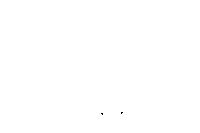

In [24]:
item = gis_source.content.get("ef7823671e844b71a3aefae143c447a1")
item

In [28]:
from IPython.display import display

# Cloning Items Between Sites (continued)


<Item title:"WorldAirports" type:Feature Layer Collection owner:admin>
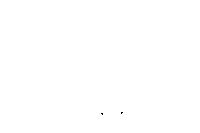

In [30]:
cloned_items = gis_dest.content.clone_items(items=[item], copy_data=True)
for ci in cloned_items:
    display(ci)

In [31]:
for ci in cloned_items:
    ci.delete()

# Groups

<center><img src="./img/groups.jpg" /></center>

- Groups are a collection of items, usually related to a specific area of interest
- Group owners can decide how content is added, removed, and shared.


## Creating Groups

In [32]:
group = gis.groups.create(title="Survey Group",
                         tags=['survey', 'fields', 'on-site'])
group

<Group title:"Survey Group" owner:admin>

## Updating Groups

group.update(thumbnail='./img/icon.png')
group

## Sharing Content to Groups

In [34]:
print(pshp.share(group.id))
print(pfgdb.share(group.id))

{'notSharedWith': [], 'itemId': '06dcb44e46ab4c5ea18132084ddef43b'}
{'notSharedWith': [], 'itemId': 'a1d5d260524d48c3968243691fe2fea9'}


## Adding/Removing Users to Groups

- Adding a User

In [35]:
group.add_users(user)

{'notAdded': []}

- Removing a User

In [36]:
group.remove_users([user.username])

{'notRemoved': []}

In [37]:
## Clean up cell do not show
pshp.unshare(group.id)
pfgdb.unshare(group.id)
group.delete()
pshp.delete()
pfgdb.delete()
fgdb_item.delete()
shp_item.delete()

True

# Credit Monitoring

<center><img src="./img/creditreport.jpg" /></center>

# Credit Monitoring (continued)

- Applies to ArcGIS Online account
- Credits are the online currency used to store, use and purchase services on ArcGIS Online

In [38]:
from arcgis.gis import GIS
gis = GIS(username="AndrewSolutions")

Enter password: ········


In [39]:
agol_user = gis.users.get("geodemo12")

## Enabling Credit Allocation

- Allows for the assignment and management of user credits

In [40]:
gis.admin.credits.default_limit

-1

In [41]:
gis.admin.credits.allocate(agol_user.username, 50)

True

In [42]:
agol_user._hydrated = False
agol_user._hydrate()

In [43]:
agol_user.assignedCredits

50.0

# Setting the Default Limits of Credits

In [44]:
gis.admin.credits.default_limit

-1

In [45]:
gis.admin.credits.default_limit = 50

In [46]:
# reset to default 
gis.admin.credits.default_limit = -1

# Tracking Organizational Consumption of Credits

- Daily usage statistics

In [47]:
import pandas as pd
data = gis.admin.credits.credit_usage()
df = pd.DataFrame.from_records([data])
df

,applogin,features,landscapeimagery,portal,scene,tiles,vectortiles
0,0.0,104.618024,0.0,0.289387,0.01842,0.360437,0.001159


# Working with ArcGIS Server

- Listing Registered Servers

In [2]:
from arcgis.gis import GIS
gis = GIS(url="https://wdcintelportal.esri.com/portal", 
          username='robe5155',
          verify_cert=False)


Enter password: ········


In [3]:
servers = gis.admin.servers
servers.list()

[<Server at https://wdcintelportal.esri.com/server/admin>]

How about a Portal with multiple ArcGIS Servers?

In [4]:
gis2 = GIS(url="https://python.playground.esri.com/portal", 
          username='bill.major',
          verify_cert=False)
servers2 = gis2.admin.servers
servers2.list()

Enter password: ········


[<Server at https://python.playground.esri.com/server/admin>,
 <Server at https://python-ga.playground.esri.com/server/admin>,
 <Server at https://python-ra.playground.esri.com/arcgis/admin>]

- Validating Server

In [5]:
servers.validate()

True

## Accessing a Single Server

### Provides Administation to:

- Logs
- Services
- Publishing SD files
- Manage machines
- Manage datastores

In [6]:
server = servers.list()[0]
server

<Server at https://wdcintelportal.esri.com/server/admin>

# Working with Logs



In [7]:
import pandas as pd

In [8]:
logs = server.logs
l = logs.query()
df = pd.DataFrame.from_dict(l['logMessages'])
df[df.type == 'SEVERE'].head()

,code,elapsed,machine,message,methodName,process,source,thread,time,type,user
4,9000,,WIN-1L0IR8L3RDV,Update for the object was not attempted. Objec...,,5720,Rest,16,1519344239803,SEVERE,
5,9000,,WIN-1L0IR8L3RDV,Update for the object was not attempted. Objec...,,5720,Rest,16,1519344237667,SEVERE,
6,9000,,WIN-1L0IR8L3RDV,Update for the object was not attempted. Objec...,,5720,Rest,16,1519344235521,SEVERE,
7,9000,,WIN-1L0IR8L3RDV,Update for the object was not attempted. Objec...,,5720,Rest,16,1519344232378,SEVERE,
8,9000,,WIN-1L0IR8L3RDV,Update for the object was not attempted. Objec...,,5720,Rest,16,1519344230242,SEVERE,


# Service Management

- Start/stop/restart service
- disable/enable KML

In [9]:
for service in server.services.list():
    print("Service Name >>>  {}".format(service.serviceName))
    if (service.serviceName == "SampleWorldCities"):
        print(service.status)
        service.stop()
        print(service.status)
        service.start()
        print(service.status)

Service Name >>>  Map
Service Name >>>  MGRS
Service Name >>>  mil
Service Name >>>  MyMapService
Service Name >>>  NYSCounties
Service Name >>>  SampleWorldCities
{'configuredState': 'STARTED', 'realTimeState': 'STARTED'}
{'configuredState': 'STOPPED', 'realTimeState': 'STOPPED'}
{'configuredState': 'STARTED', 'realTimeState': 'STARTED'}


## Enable/Disable KML Extensions

In [11]:
for service in server.services.list():
    if (service.serviceName == "SampleWorldCities"):
        p = dict(service.properties)
        for ext in p['extensions']:
            print(ext['typeName'])
            if ext['typeName'] == 'KmlServer' and \
               ext['enabled'] == 'true':
                ext['enabled'] = 'false'
            elif ext['typeName'] == 'KmlServer' and \
               ext['enabled'] == 'false':
                ext['enabled'] = 'true'
        print(service.edit(p))
        # Restart service
        service.stop()
        service.start()

NAServer
SchematicsServer
WCSServer
WFSServer
WMSServer
KmlServer
FeatureServer
True


## Monitoring server usage

- What is the total number of requests that my ArcGIS Server site handled during the past week?
- How was the service request load distributed during the past month?
- How are my services performing on an hourly basis?
- What was the maximum number of service instances used at any given time for a particular service?

In [12]:
server.usage.settings

{'enabled': True,
 'maxHistory': 0,
 'samplingInterval': 30,
 'statisticsDir': 'D:\\arcgisserver\\directories\\arcgissystem'}

## Built in Usage Reports

In [16]:
usage_reports = server.usage.list()
for r in usage_reports:
    print(r.properties['reportname'])

Max response times for the last 7 days
Publishing Requests Past 30 Days
Timed-out requests for the last 7 days
Total requests for the last 7 days


## Usage Data

- Insights to server load

In [25]:
max_resp_report = usage_reports[0]
data = max_resp_report.query()

In [26]:
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

In [27]:
#store reponse times in Y axis
data_y = data['report']['report-data'][0][0]['data']

#convert dates to readable dates and store in X axis
data_x = [pd.to_datetime(datetime.fromtimestamp(d//1000)) \
          for d in data['report']['time-slices']]

#create a Pandas DataFrame from the report
df = pd.DataFrame(list(zip(data_x, data_y)), columns=["date", "count"])
q = df['count'].isnull() # change NaN values to 0
df.loc[q, 'count'] = 0
df.index = df['date']
df['count'] = df['count'] 
df['date'] = df['date'].astype(str)

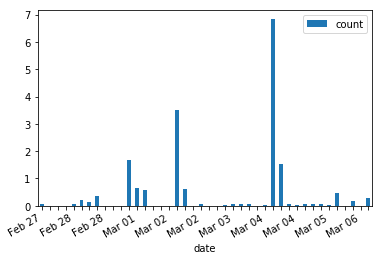

In [28]:
#plot as a bar chart
ax = df.plot(kind='bar', x=df['date'])
ticklabels = ['']*len(df.index)
ticklabels[::4] = [item.strftime('%b %d') for item in df.index[::4]]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
plt.gcf().autofmt_xdate()
plt.show()

## Quick Reports

- deleted after use

In [29]:
data = server.usage.quick_report(since="LAST_MONTH", 
                                 metrics="RequestCount")

In [30]:
#store reponse times in Y axis
data_y = data['report']['report-data'][0][0]['data']

#convert dates to readable dates and store in X axis
data_x = [pd.to_datetime(datetime.fromtimestamp(d//1000)) \
          for d in data['report']['time-slices']]

#create a Pandas DataFrame from the report
df = pd.DataFrame(list(zip(data_x, data_y)), columns=["date", "count"])
q = df['count'].isnull() # change NaN values to 0
df.loc[q, 'count'] = 0
df.index = df['date']
df['count'] = df['count'] 
df['date'] = df['date'].astype(str)

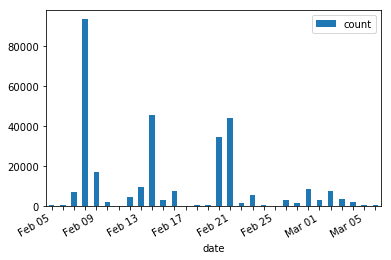

In [31]:
#plot as a bar chart
ax = df.plot(kind='bar', x=df['date'])
ticklabels = ['']*len(df.index)
ticklabels[::4] = [item.strftime('%b %d') for item in df.index[::4]]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
plt.gcf().autofmt_xdate()
plt.show()

# Monitoring server licenses and extensions

- Use the licenses property of Server.system object to get a dictionary of various licenses and extensions available on the server.

In [4]:
from arcgis.gis import GIS
import pandas as pd
gis = GIS(profile="wdcintelportal_bill")
server = gis.admin.servers.list()[0]

In [5]:
df = pd.DataFrame.from_dict(server.system.licenses['features'])
df.head()

,canExpire,coreCount,displayName,expiration,isValid,name,version
0,True,4,ArcGIS Server Advanced Core,1539648000000,True,esriServerLicenseAdvanced,10.6
1,True,0,Workflow Manager Extension for ArcGIS Server,1539648000000,True,esriServerWorkflowManager,10.6
2,True,0,StreetMap Premium North America for ArcGIS Ent...,1539648000000,True,esriServerStreetMapPremiumNorthAmerica,10.6
3,True,0,Business Analyst Extension for ArcGIS Server,1539648000000,True,esriServerBusiness,10.6
4,True,0,ArcGIS for INSPIRE,1539648000000,True,esriServerINSPIRE,10.6


In [6]:
pd.DataFrame.from_dict([server.system.licenses['edition']])

,canExpire,expiration,featureName,name,version
0,True,1539648000000,esriServerLicenseAdvanced,svradvanced,10.6


## Working with registered Data Stores in ArcGIS Server

In [7]:
for ds in server.datastores.list():
    print(ds.type, ds.provider, ds.path)
    if ds.type == "egdb":
        resp = ds.validate()
        print("\tDoes it validate?  {}".format(resp))

egdb ArcGIS Data Store /enterpriseDatabases/AGSDataStore_ds_o4zf6mu4
	Does it validate?  True
nosql ArcGIS Data Store /nosqlDatabases/AGSDataStore_nosqldb_ds_o4zf6mu4


In [11]:
gis2 = GIS(profile="pythonplayground_bill")
hostingserver = gis2.admin.servers.list()[0]
for ds in hostingserver.datastores.list():
    print(ds.type)

bigDataFileShare
nosql
nosql
egdb


# Scripting the Python API

Do I need to use Jupyter Notebooks for the ArcGIS API for Python for automating tasks?
#### NO! ####

Can I use my favorite Python IDE (e.g. vim) to write scripts as usual?
#### YES! ####

Use Windows Task Scheduler or Crontab as you normally would. Just make sure you have all the necessary dependencies installed for the capabilities in the Python API installed on the execution system.

If I write scripts and run them command line, does that mean I can't take advantage of the spatial Pandas Dataframe or the Analysis capabilities of the ArcGIS API for Python since it won't run in a Jupyter Notebook?

#### NO! ####

You just won't be able to visual the results, like in this presentation.

## Using the ArcGIS API for Python in AWS Lambda ##

Why do I want to do this?  There could be any number of reasons.
- User Management in my AGOL Organization
- Automate Content Management Policies - poorly tagged items
- Automate Publishing workflows, e.g. publishing S3 content as it lands in a bucket
- Create administration dashboard of your AGOL/ArcGIS Enterprise

How do you accomplish this?  

With the ArcGIS API for Python 1.4 release, Esri now provides a `pip` install which makes this process more streamlined.

If you are interested in many types of administrative or content publishing workflows, it does not require numpy or pandas dependencies.

Steps to accomplish
-  From client workstation, pip install the ArcGIS API for Python to its own folder.
    +  `pip install --target=c:\aws_findOldLogins arcgis --no-deps`
-  Create your primary AWS Python Lambda script in this folder, e.g. c:\aws_findOldLogins\findStaleLogins.py
    +  Be sure to follow Lambda requirements of having a lambda_handler() entry point
-  Zip the contents of this folder, but not the parent folder.
-  Create a new AWS Python Lambda function, but chose to Upload your zip file as the function.


<center><img src='./img/lambda1.png' /></center>

<center><img src='./img/lambda2.png' /></center>

<a href="https://s3-us-west-1.amazonaws.com/enterprise-dashboard/index.html">ArcGIS Enterprise Sample Dashboard</a>

# Questions?